# 2차 과제

## 16조
2019112127 박세호, 2020112167 민장규, 2020112089 최지안

## 데이터 소개
사용한 dataset : https://www.kaggle.com/datasets/kukuroo3/used-car-price-dataset-competition-format

### Feature 소개
- carID : 고유 ID
- brand : 회사 브랜드
- model : 모델명
- year : 출시년도
- transmission : 변속기
- mileage : 주행거리
- fuelType : 연료 유형
- tax : 세금
- mpg : Miles Per Gallon
- engineSize : 엔진 배기량
- price : 가격

## 개요

### 데이터 전처리

- 중복값 처리
- 결측치 처리
- 범주형 변수 원핫 인코딩

### Linear Regression without sklearn

### Linear Regression with sklearn

### Polynomial Regression

### Modeling nonlinear relationships in the Car Price Dataset

### Model Complexity and Overfitting

### Using regularized methods for regression
- Ridge
- Lasso

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

import seaborn as sns


In [2]:
data = pd.read_csv('used_car_price_dataset.csv')

In [3]:
data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990


In [4]:
data.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,15832.446169,2016.737903,24956.286895,152.332661,50.370766,2.124375,23469.943750
std,2206.717006,2.884035,24443.333662,82.403844,35.746505,0.789368,16406.714563
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13929.250000,2016.000000,5641.250000,145.000000,38.700000,1.600000,12000.000000
50%,15840.000000,2017.000000,19000.000000,145.000000,47.100000,2.000000,18999.000000
75%,17765.750000,2019.000000,36702.000000,150.000000,54.300000,2.800000,30335.750000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


## 중복값 처리

In [5]:
print("중복된 data 개수 :", len(data[data.duplicated()]))

중복된 data 개수 : 0


## 결측치 처리

In [6]:
data.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [7]:
#carID는 index로 지정
data = data.set_index('carID')

## 범주형 변수 이진화

In [8]:
categorical_features = ['brand', 'model', 'transmission','fuelType']

for col in categorical_features:
    print(data[col].value_counts())
    print()

brand
merc        790
vw          768
ford        766
bmw         638
hyundi      511
toyota      446
skoda       425
audi        343
vauxhall    273
Name: count, dtype: int64

model
 Arteon         167
 Grand C-MAX    164
 Scirocco       163
 Prius          154
 Santa Fe       150
               ... 
 Eos              5
 Z3               5
 Getz             4
 CLK              4
 IQ               2
Name: count, Length: 90, dtype: int64

transmission
Manual       1948
Automatic    1660
Semi-Auto    1351
Other           1
Name: count, dtype: int64

fuelType
Diesel      2989
Petrol      1754
Hybrid       189
Other         26
Electric       2
Name: count, dtype: int64



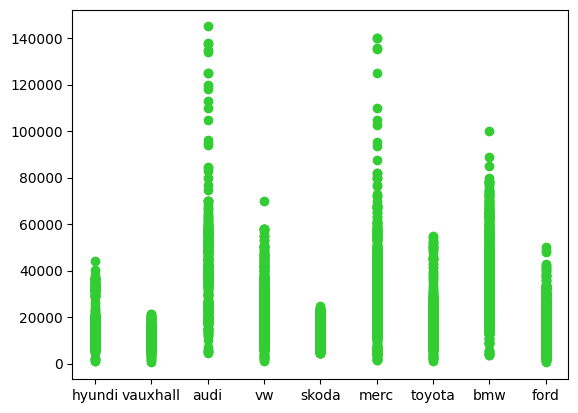

In [9]:
plt.scatter(data['brand'], data['price'], color='limegreen')
plt.show()

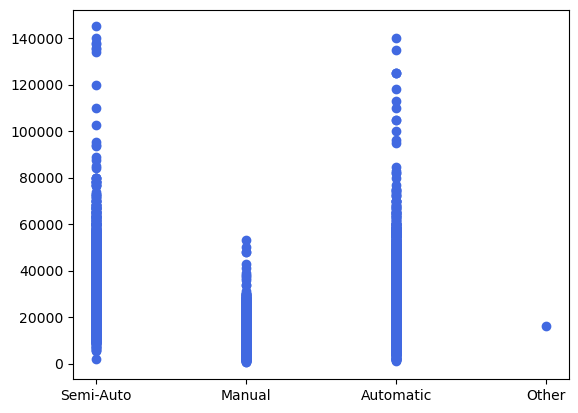

In [10]:
plt.scatter(data['transmission'], data['price'], color='royalblue')
plt.show()

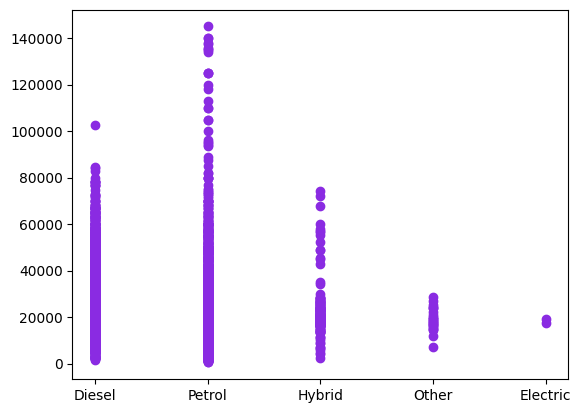

In [10]:
plt.scatter(data['fuelType'], data['price'], color='blueviolet')
plt.show()

In [11]:
# 모델명을 제외한 범주형 변수에 대해 원핫 인코딩 진행
categorical_features = ['brand', 'transmission', 'fuelType']

for col in categorical_features:
    data = pd.concat([data, pd.get_dummies(data[col])], axis=1)

data.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,...,vw,Automatic,Manual,Other,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
carID,,,,,,,,,,,,,,,,,,,,,
13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995,...,False,False,False,False,True,True,False,False,False,False
17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700,...,False,False,True,False,False,True,False,False,False,False
12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990,...,False,True,False,False,False,False,False,False,False,True
13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999,...,True,True,False,False,False,True,False,False,False,False
16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990,...,False,False,False,False,True,False,False,False,False,True


In [12]:
#categorical feature 삭제
categorical_features = ['brand', 'model','transmission', 'fuelType']

data.drop(categorical_features, axis=1, inplace = True)

<Axes: >

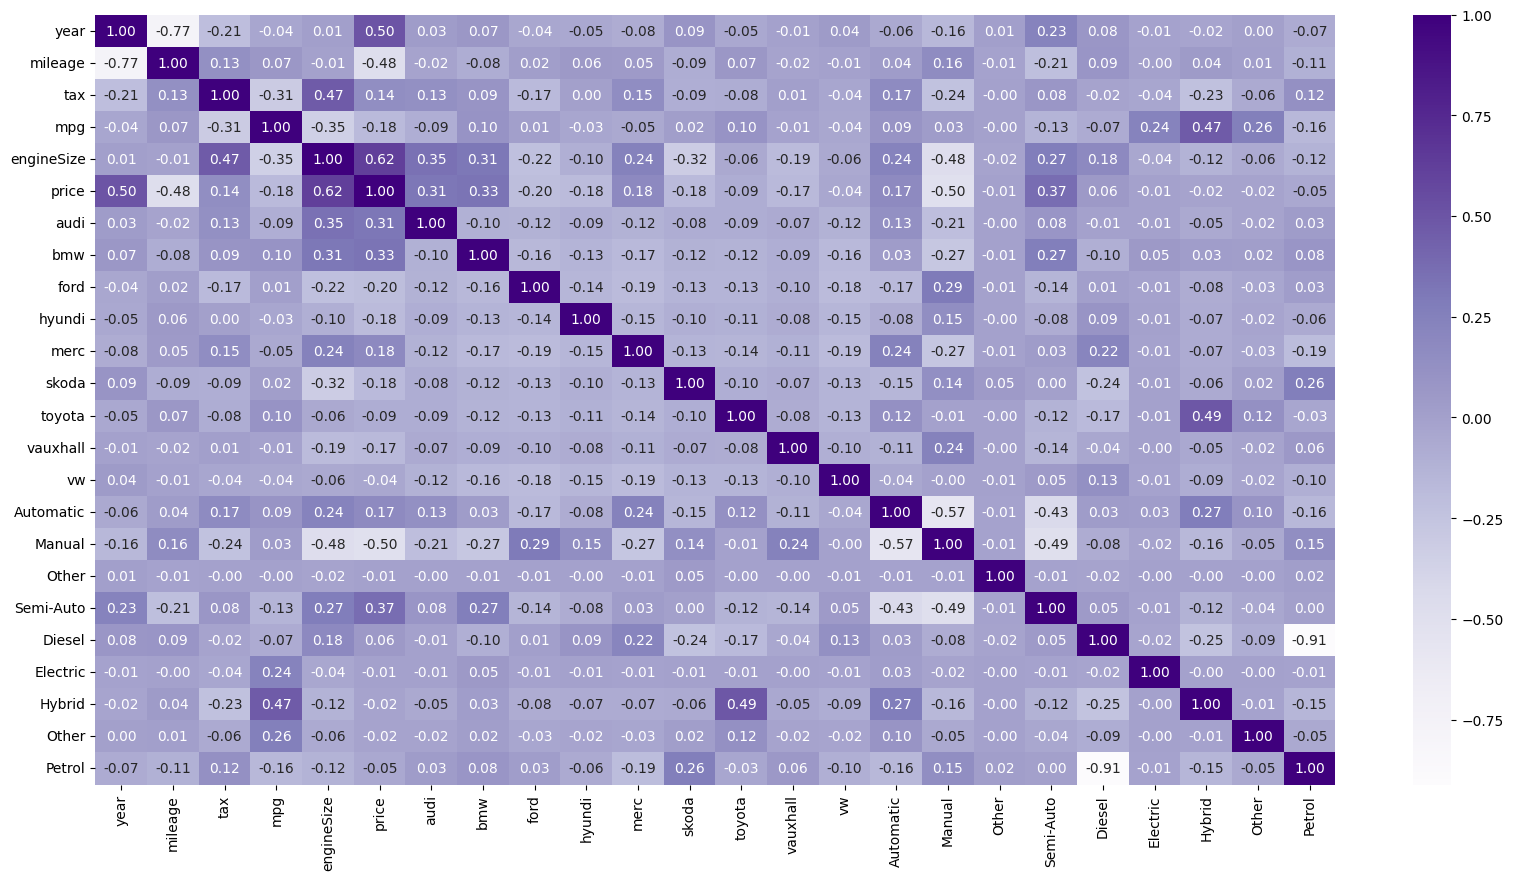

In [13]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt=".2f" ,cmap='Purples')

In [14]:
# price와 상관관계가 높은 변수 분석
p_corr = corr.loc['price']
p_corr = p_corr[abs(p_corr)>0.4].sort_values(ascending=False)
print(p_corr)

price         1.000000
engineSize    0.624899
year          0.501296
mileage      -0.478705
Manual       -0.502716
Name: price, dtype: float64


# Linear Regression

## Linear Regression without sklearn

## Linear Regression with sklearn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [15]:
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(f'train data 개수 : {len(X_train)}, test data 개수 :{len(X_test)} ')

train data 개수 : 3968, test data 개수 :992 


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
model.coef_

array([ 1.76819487e+03, -1.28440354e-01, -7.69714915e+00, -1.76480682e+01,
        9.18974505e+03,  8.32520705e+03,  5.71517045e+03, -2.06860200e+03,
       -3.83000825e+03,  4.65232517e+03, -4.41820975e+03, -3.41435040e+03,
       -4.46425782e+03, -4.97274443e+02,  1.53370120e+02, -1.75449093e+03,
       -2.94030327e+02,  1.89515114e+03, -5.40228511e+03,  4.07748953e+03,
        2.15358967e+03,  2.68306885e+03, -3.51186295e+03])

In [18]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [19]:
mean_squared_error(y_train_pred , y_train) , mean_squared_error(y_test_pred , y_test)

(73507238.6631168, 84004895.65492809)

In [20]:
print('train R^2: ',r2_score(y_train_pred , y_train) , ', test R^2: ',r2_score(y_test_pred , y_test))

train R^2:  0.6135278632838381 , test R^2:  0.5734436475946117


In [21]:
print("Train Adjusted R^2:",1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("Test Adjusted R^2:",1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Train Adjusted R^2: 0.7196294869881642
Test Adjusted R^2: 0.7036558565894278


# Polynomial Regression

In [22]:
# 독립변수(X)와 종속변수(y) 설정
X = car_data[['feature1', 'feature2', '...']]  # 사용할 독립변수들을 선택
y = car_data['Price']  # 예측하고자 하는 종속변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다항 특성 추가
degree = 2  # 다항 차수 설정
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 다항 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 훈련 데이터에 대한 예측
y_train_pred = model.predict(X_train_poly)

# 테스트 데이터에 대한 예측
y_test_pred = model.predict(X_test_poly)

# 성능 평가
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Test Mean Squared Error: {test_mse:.2f}')

# 결과 시각화
# 예측 결과와 실제 결과를 비교하는 시각화 코드를 추가합니다.
plt.scatter(X_test['feature1'], y_test, color='black', label='Actual')
plt.scatter(X_test['feature1'], y_test_pred, color='blue', label='Predicted')
plt.xlabel('Feature 1')
plt.ylabel('Price')
plt.legend()
plt.show()


# Modeling nonlinear relationships in the Car Price Dataset

# Model Complexity and Overfitting

# Using regularized methods for regression

## Ridge

In [24]:
from sklearn.linear_model import Ridge

# alpha는 정규화 강도를 조절하는 매개변수입니다.
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Ridge()

## Lasso

In [23]:
from sklearn.linear_model import Lasso

# alpha는 정규화 강도를 조절하는 매개변수입니다.
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)


/Users/sayyyho/miniconda3/envs/datascience/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.629e+10, tolerance: 1.046e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()